In [2]:
import sys
from rdkit import Chem
from rdkit.Chem import AllChem
# sys.path.append("/home/stef/Tb/reaction_mapping")
# from utils import sanitize
import csv
import pandas as pd

O=C1CCCCO1
C=C1CCCOC1=O


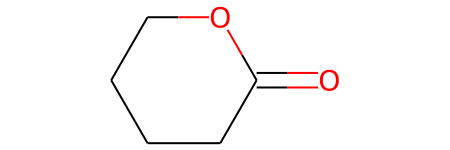

In [5]:
# Write out smiles of start and target

dvl_smi = 'C1(CCCCO1)=O'
mvl_smi = 'C1(C(CCCO1)=C)=O'

dvl_smi, mvl_smi = sanitize([dvl_smi, mvl_smi])
print(dvl_smi)
print(mvl_smi)

Chem.MolFromSmiles(dvl_smi)

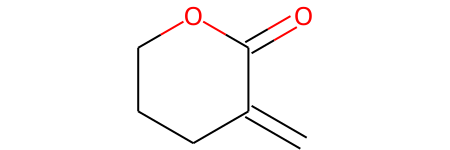

In [6]:
Chem.MolFromSmiles(mvl_smi)

In [9]:
# Save starting compound
header = ['id', 'smiles']
starter = ['dvl', dvl_smi]
save_to = 'dvl_smi.csv'

with open(save_to, 'w') as f:
    writer = csv.writer(f)
    writer.writerow(header)
    writer.writerow(starter)

# Save target compound
header = ['id', 'smiles']
starter = ['mvl', mvl_smi]
save_to = 'mvl_smi.csv'

with open(save_to, 'w') as f:
    writer = csv.writer(f)
    writer.writerow(header)
    writer.writerow(starter)



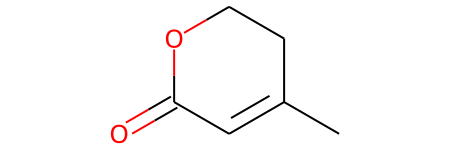

In [10]:
# General procedure


starters = ['C1(C=C(CCO1)C)=O']
targets = ['C1(CC(CCO1)C)=O']

starters = sanitize(starters)
targets = sanitize(targets)

Chem.MolFromSmiles(starters[0])

In [11]:
# Save starting compounds
header = ['id', 'smiles']
save_to = 'starters.csv'

with open(save_to, 'w') as f:
    writer = csv.writer(f)
    writer.writerow(header)
    for i, starter in enumerate(starters):
        writer.writerow(["starter_{}".format(i+1), starter])

# Save target compound
header = ['id', 'smiles']
save_to = 'targets.csv'

with open(save_to, 'w') as f:
    writer = csv.writer(f)
    writer.writerow(header)
    for i, target in enumerate(targets):
        writer.writerow(["target_{}".format(i+1), target])


Central carbon metabolism intermediates to lactone precursors.

In [9]:
# Succinate to MVL precursor
m2s = Chem.MolToSmiles
s2m = Chem.MolFromSmiles
canon = lambda x : m2s(s2m(x))
header = ['id', 'smiles']
save_dir = '../src/starters_targets_rules/'
starter_fn = 'succinate.csv'
target_fn = 'mvacid.csv'

target_smi = 'C(CCC(C(O[H])=O)=C)O[H]'
target_smi = canon(target_smi)

succ_smi = 'C(CC(=O)[O-])C(=O)[O-]'
succ_smi = canon(succ_smi)

starter_df = pd.DataFrame(data=[['succinate', succ_smi]], columns=header)
starter_df.to_csv(save_dir + starter_fn, sep=',', index=False)

target_df = pd.DataFrame(data=[['mvacid', target_smi]], columns=header)
target_df.to_csv(save_dir + target_fn, sep=',', index=False)


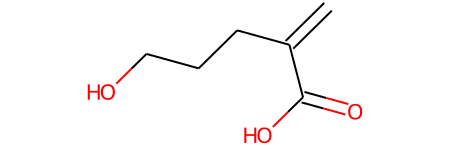

In [7]:
s2m(target_smi)